# Linear Regression of Boston housing prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Converting the data into pandas dataframe
data = pd.read_csv("E:\\Tejas\\HousingData.csv")

### First look at the dataset

In [3]:
#First look at the data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
#Shape of the data
print(data.shape)

(506, 14)


In [5]:
#Checking the statistics of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#Checking the null values in the dataset
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
#Handling missing values
from sklearn.impute import SimpleImputer
mean=SimpleImputer(strategy='most_frequent',missing_values=np.nan)
ol=mean.fit_transform(data[['CRIM','CHAS','ZN','INDUS','AGE','LSTAT']])
ol=pd.DataFrame(ol,columns=['CRIM','CHAS','ZN','INDUS','AGE','LSTAT'])
data[['CRIM','CHAS','ZN','INDUS','AGE','LSTAT']]=ol

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<a id = 'visual'></a>
# Visualisation

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_4172\2429711700.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.MEDV)


<Axes: xlabel='MEDV', ylabel='Density'>

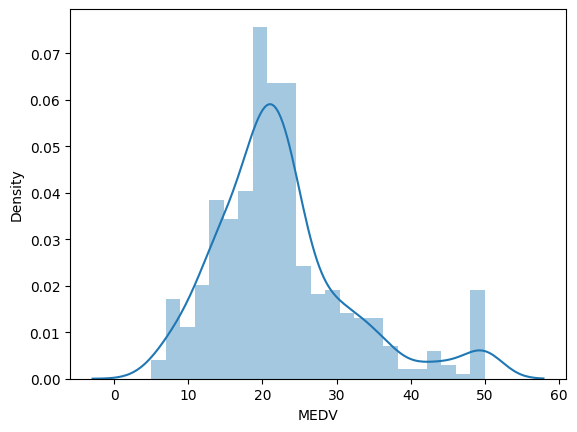

In [10]:
#checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.MEDV)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

<Axes: ylabel='MEDV'>

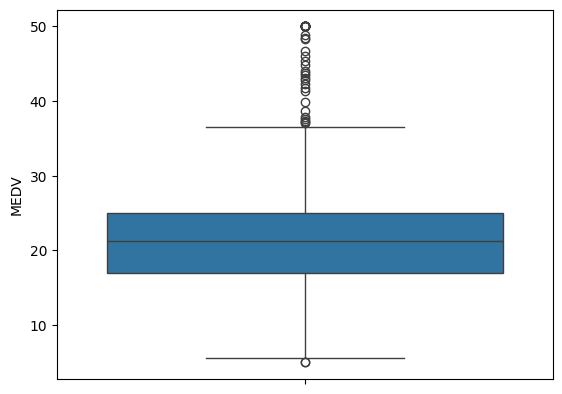

In [11]:
#Distribution using box plot
sns.boxplot(data.MEDV)

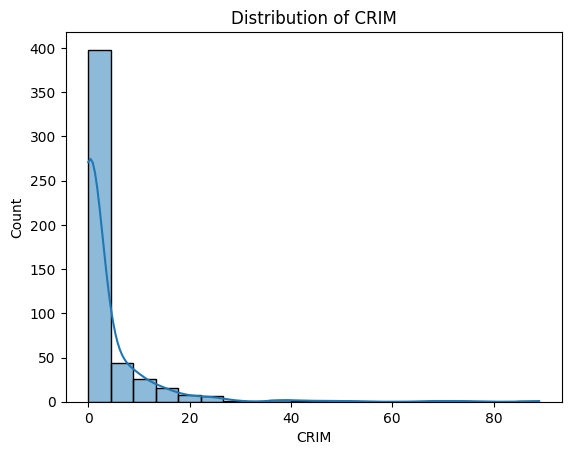

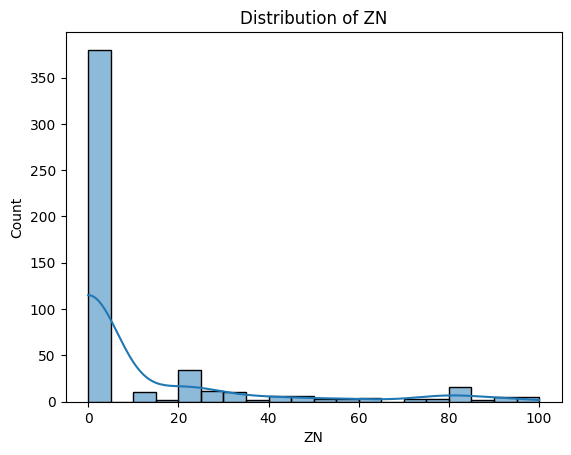

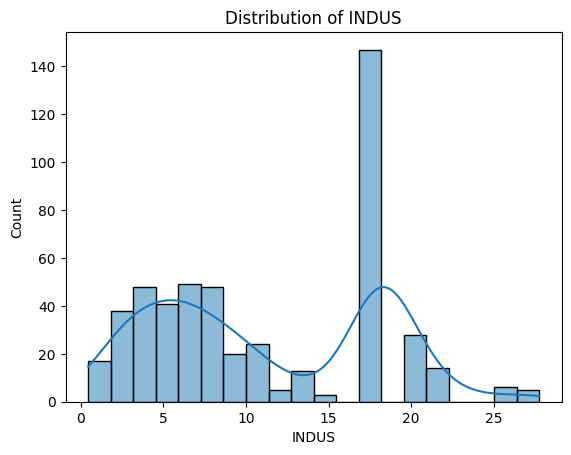

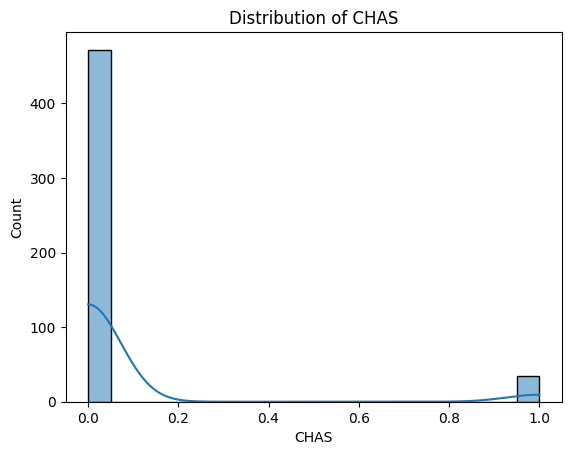

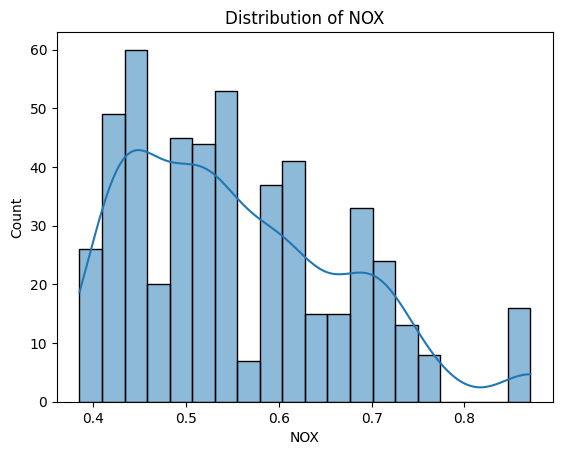

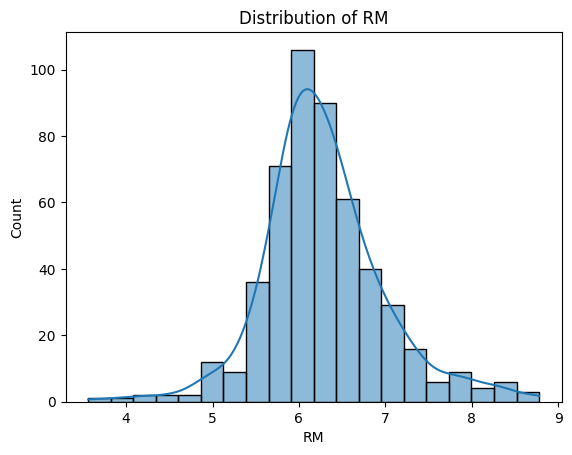

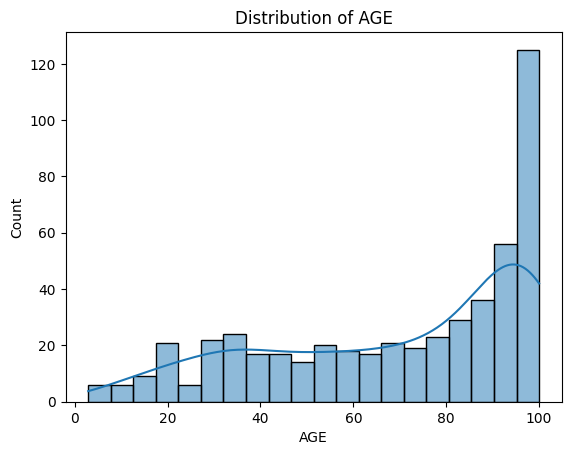

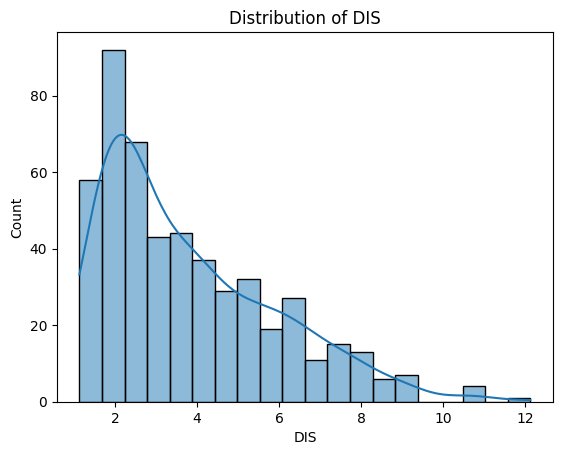

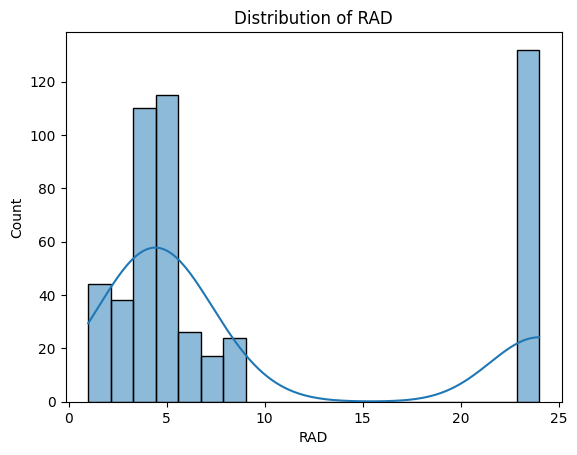

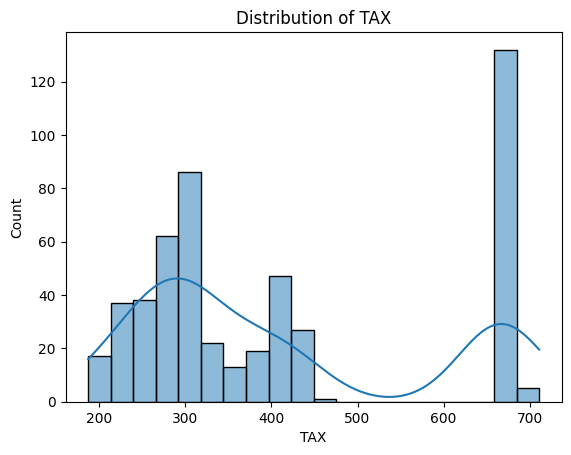

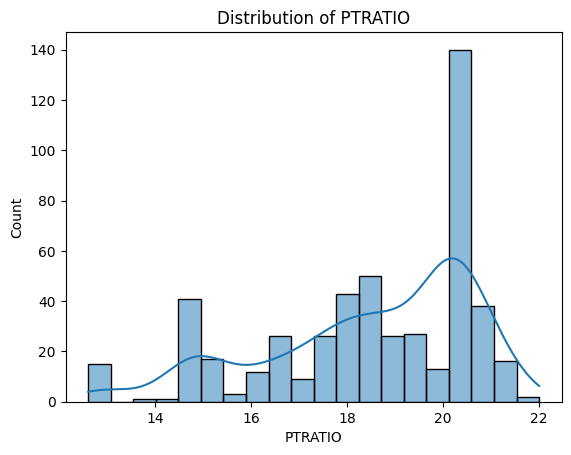

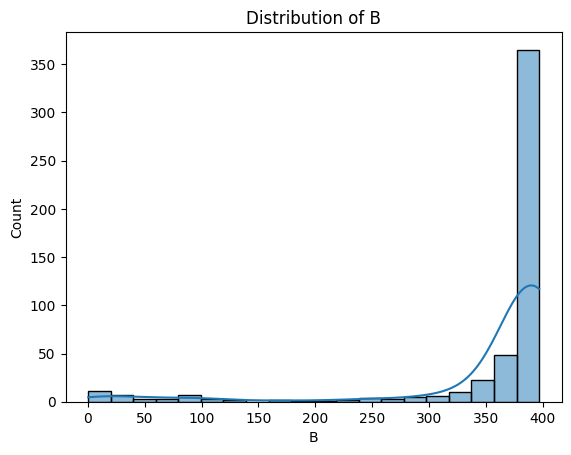

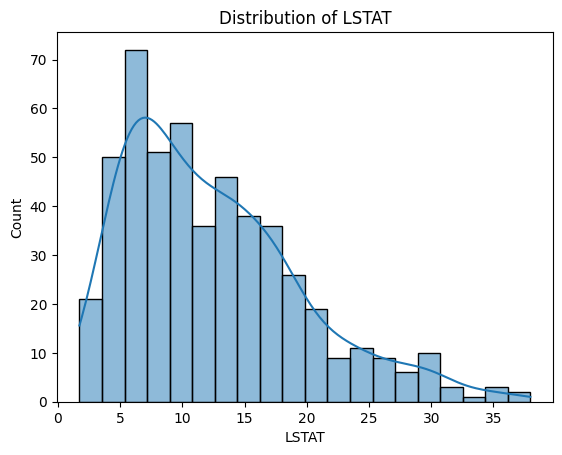

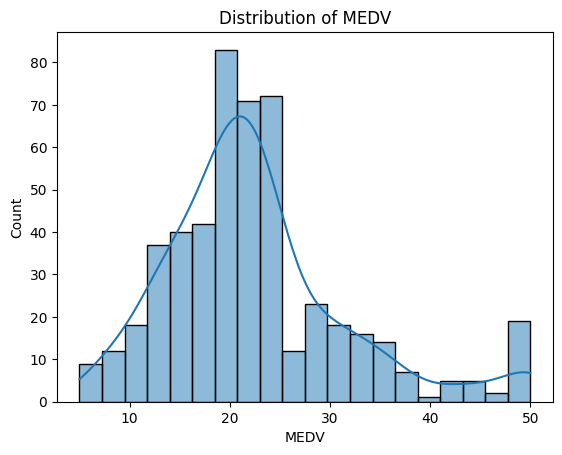

In [12]:
columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
for col in columns:
 plt.figure()
 sns.histplot(data[col], bins=20, kde=True)
 plt.title(f'Distribution of {col}')
 plt.show()

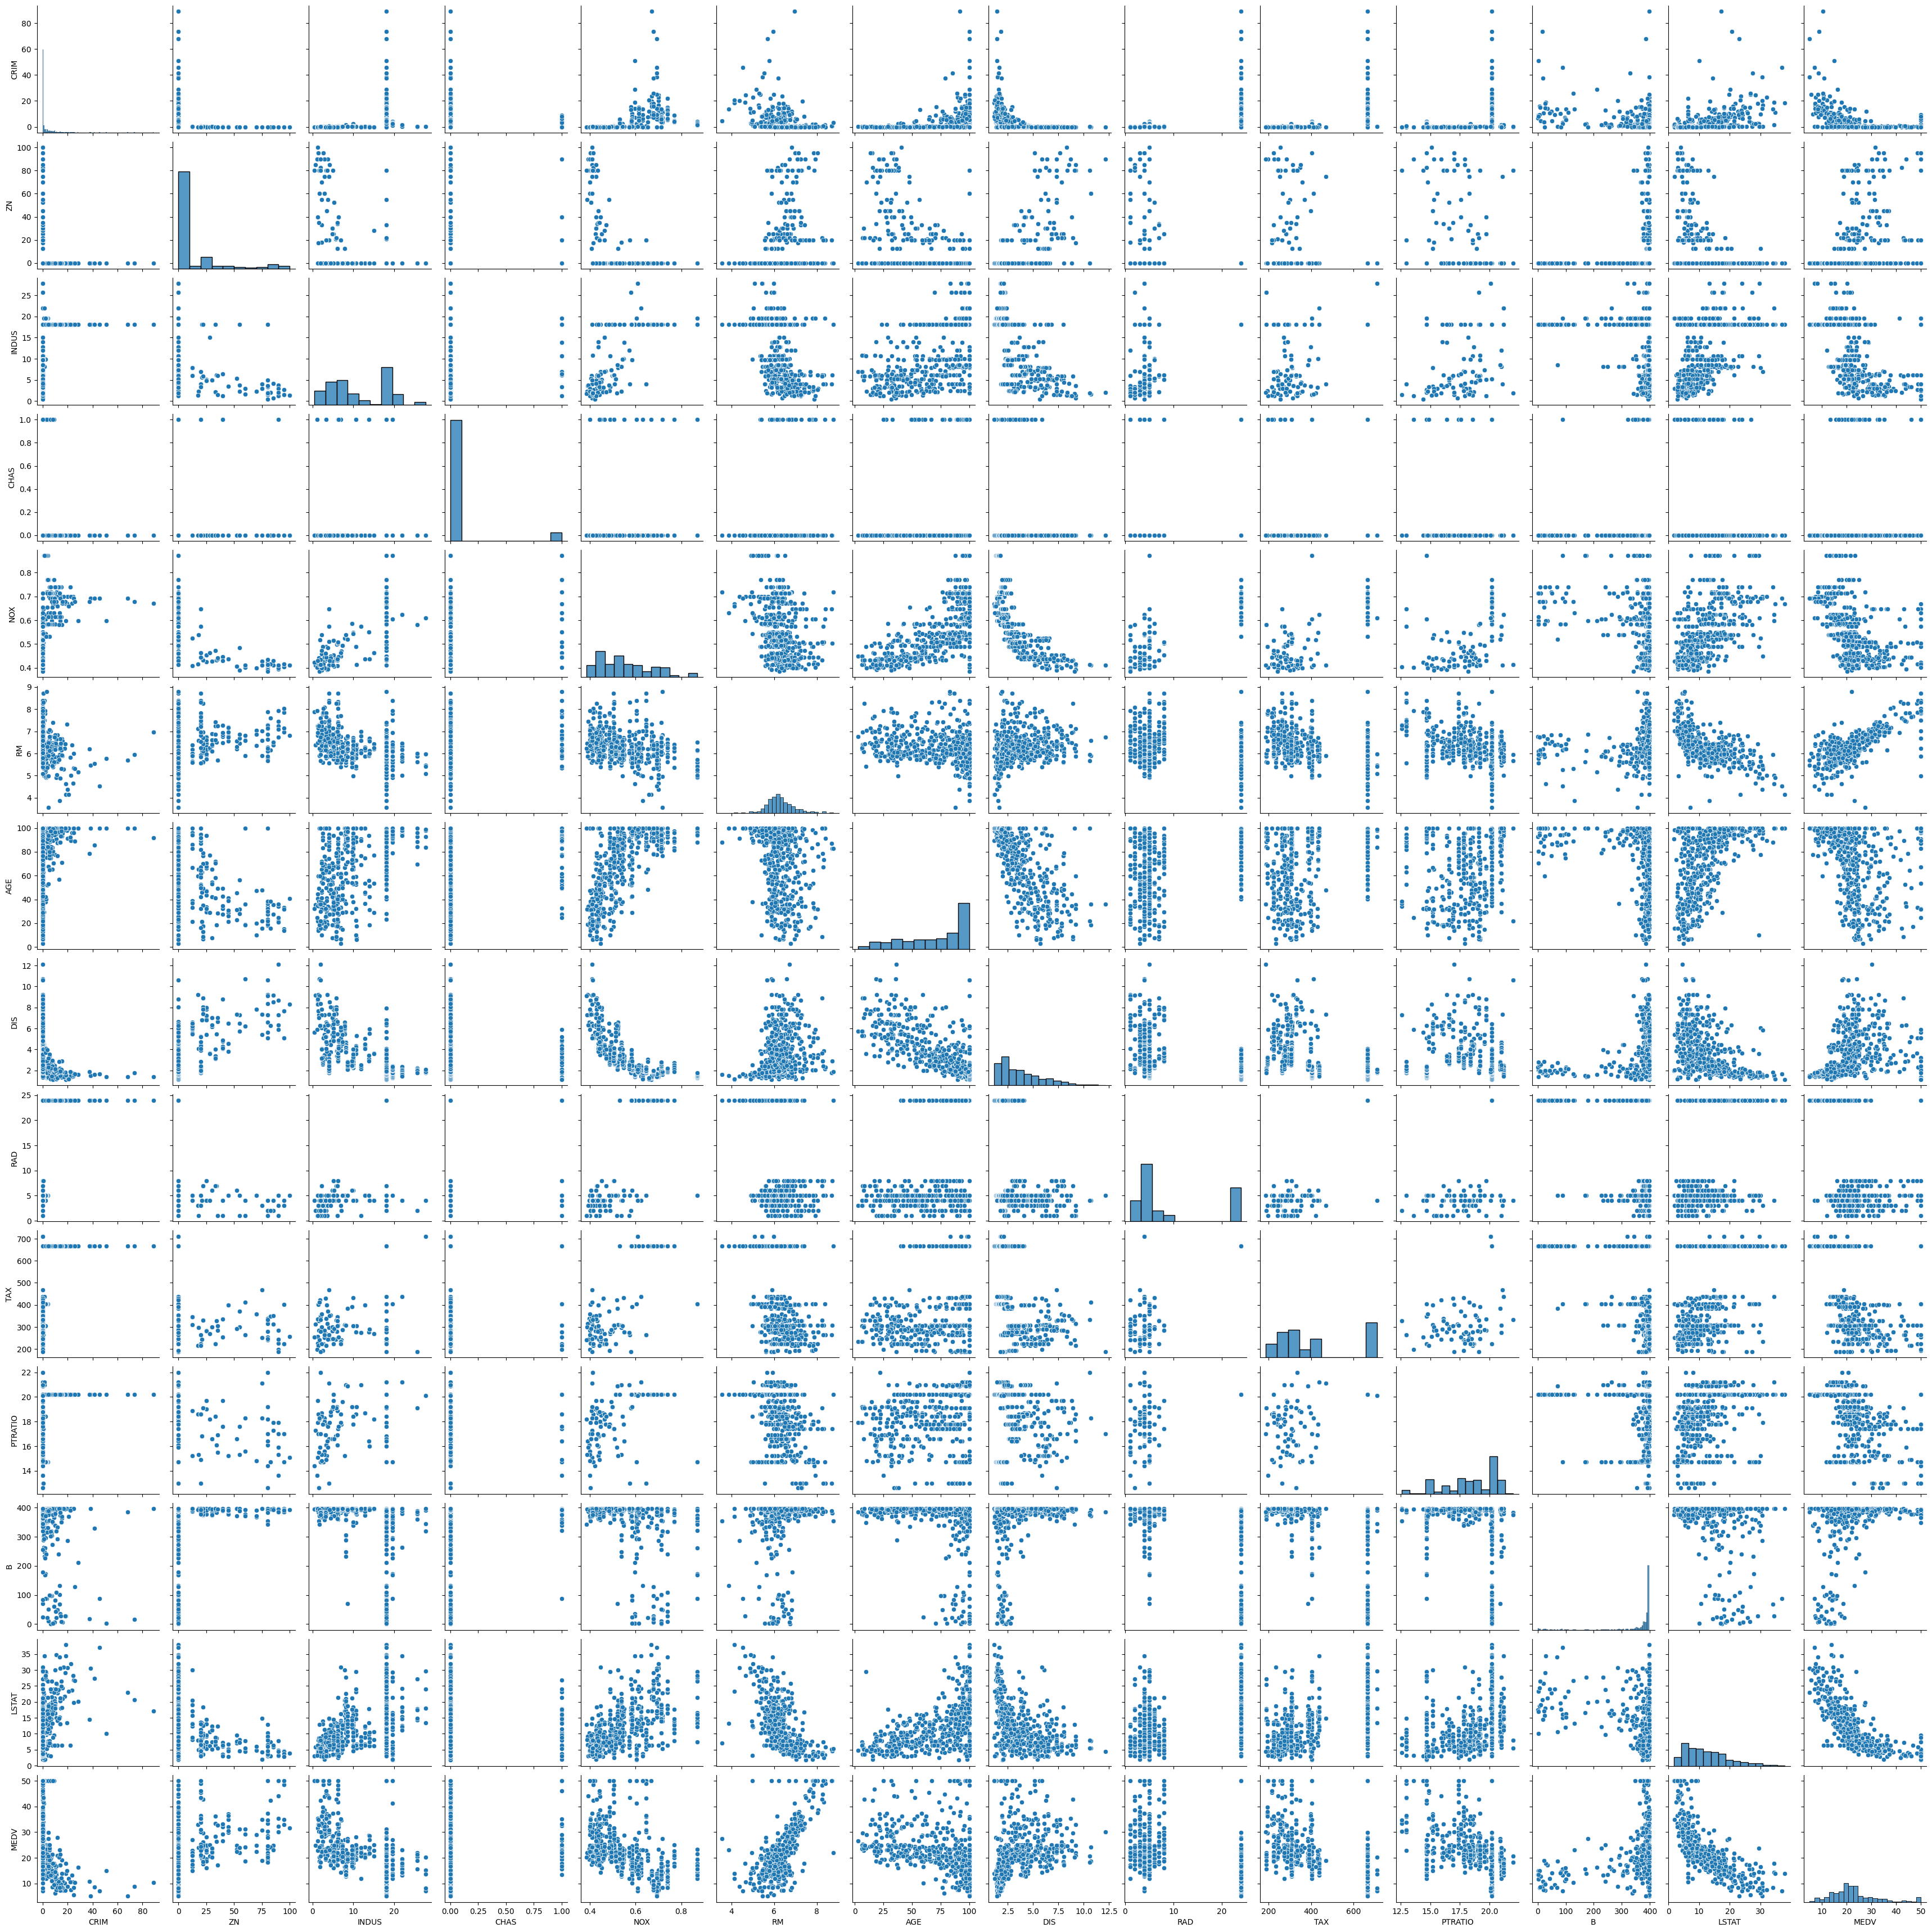

In [13]:
#Pair Plot
sns.pairplot(data)
plt.show()

<a id = 'corr'></a>
### Checking the correlation of the independent feature with the dependent feature

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.An intelligent correlation analysis can lead to a greater understanding of your data

In [14]:
#checking Correlation of the data 
correlation = data.corr()
correlation.loc['MEDV']

CRIM      -0.384108
ZN         0.362292
INDUS     -0.478199
CHAS       0.183844
NOX       -0.427321
RM         0.695360
AGE       -0.363636
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.718649
MEDV       1.000000
Name: MEDV, dtype: float64

<Axes: >

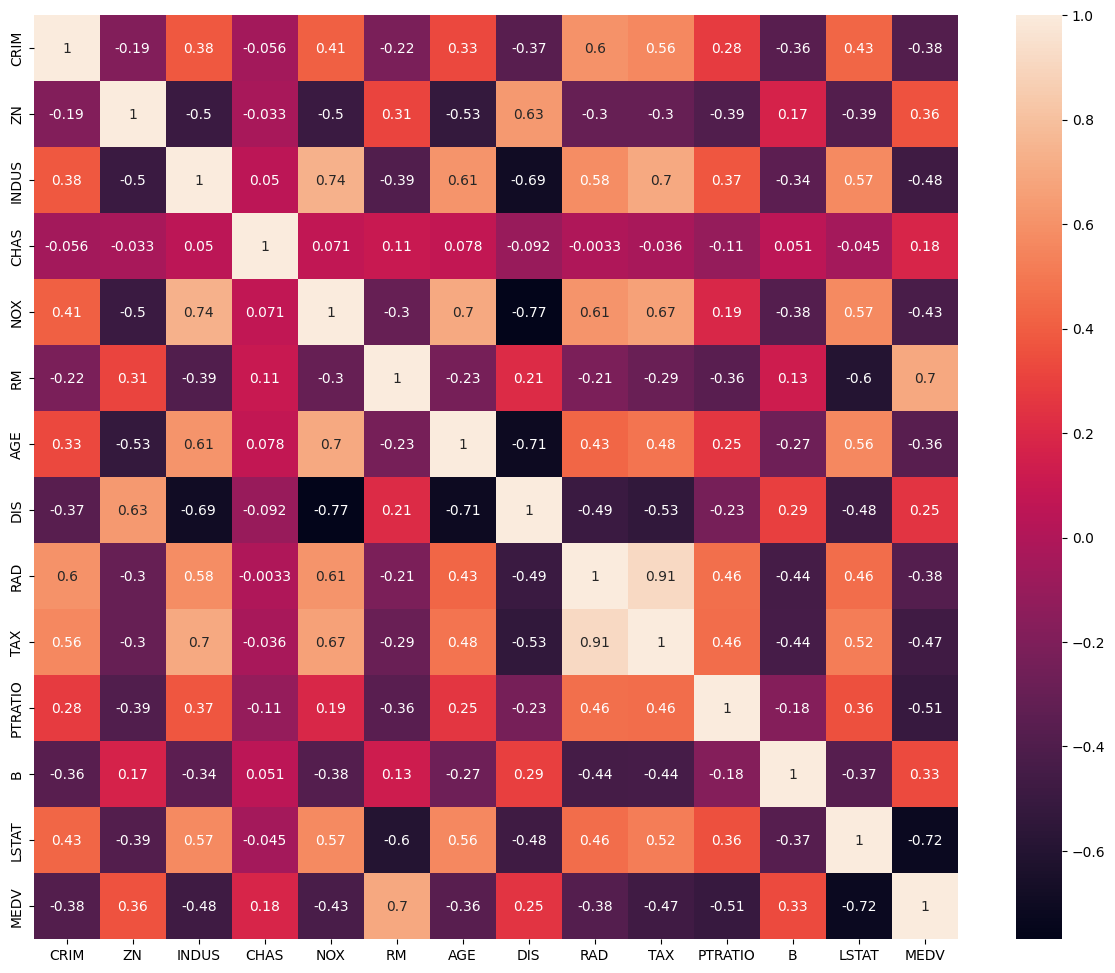

In [15]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

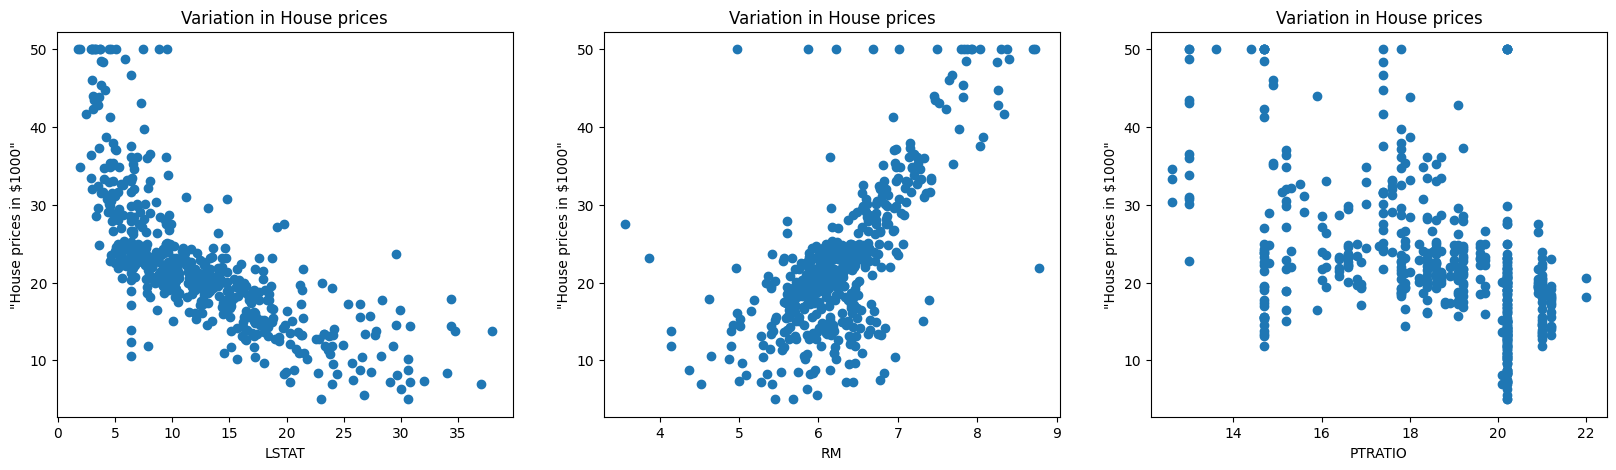

In [16]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = data.MEDV
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [17]:
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]
y= data.MEDV

<a id = 'valid'></a>
### Splitting the data for Model Validation 

In [18]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [19]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the Model 

In [20]:
#Creating the neural network model
model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')


In [21]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 584.3467
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 571.2054
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 546.4650
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 455.1204
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 246.4771
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 84.8576
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 46.3356
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 29.4962
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 24.8556
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 21.6727
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 20.3650
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 18.9527
Epoch 13/100
13/13 [

<a id = 'eval'></a>
### Evaluation of the model

In [22]:
# Assuming you have your trained model and X_test is your test data
y_pred = model.predict(X_test)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#R2 Score
r2 = r2_score(y_test, y_pred)
print(r2)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


4/4 [==============================] - 0s 2ms/step
0.8782114410641518
Mean Absolute Error: 2.15
Mean Squared Error: 11.31
Root Mean Squared Error: 3.36
R2 Score: 0.88
